**Thêm thư viện**

In [37]:
import pandas as pd
import statistics as sta
from scipy import stats
import matplotlib.pyplot as plt
import statsmodels.api as sm
import seaborn as sns


**Đọc dữ liệu từ file csv và in ra vài dòng đầu**

In [38]:
csv = "output.csv"
data = pd.read_csv(csv)
data.head(10)

,p_cate,p_name,p_price,p_rating,s_name,s_rating
0,Bếp & Phòng ăn,Hộp quà bí ẩn,34.500 ₫,NaN,shishang9,NaN
1,Giày dép & Quần áo nam,DIRTYCOINS Graffitee T-shirt,350.000 ₫,NaN,Dirty Coins,NaN
2,Giày dép & Quần áo nam,[HCM][Voucher 10%] Áo thun Teeworld Saigonese ...,201.000 ₫,NaN,Teeworld Fashion - Thế Giới Áo Thun,NaN
3,Văn phòng phẩm và nghề thủ công,Hộp quà bí ẩn-Tri ân khách hàng- tặng 1 hộp qu...,9.350 ₫,NaN,Chamy,NaN
4,Điện thoại & Máy tính bảng,Điện thoại Iphone X 64g - 256g quốc tế mới 98%,4.444.310 ₫,NaN,ShopcongngheHT,NaN


**Xử lý và chuyển giá sản phẩm thành dạng số thực**

In [40]:
price = data["p_price"]
new_price = []
for item in price:
    item = str(item)
    if "." in item:
        item = item.replace(".","") # Xóa dấu chấm trong giá tiền
    if item[-1]=="₫":   # Xóa kí tự ₫ trong giá tiền
        item = item.replace("₫","")
    item = item.strip()     # Loại bỏ khoảng trắng trước và sau giá tiền
    new_price.append(int(item))   # Chuyển giá tiền về kiểu dữ liệu số nguyên
data["p_price"] = new_price
data.head()

,p_cate,p_name,p_price,p_rating,s_name,s_rating
0,Bếp & Phòng ăn,Hộp quà bí ẩn,34500,NaN,shishang9,NaN
1,Giày dép & Quần áo nam,DIRTYCOINS Graffitee T-shirt,350000,NaN,Dirty Coins,NaN
2,Giày dép & Quần áo nam,[HCM][Voucher 10%] Áo thun Teeworld Saigonese ...,201000,NaN,Teeworld Fashion - Thế Giới Áo Thun,NaN
3,Văn phòng phẩm và nghề thủ công,Hộp quà bí ẩn-Tri ân khách hàng- tặng 1 hộp qu...,9350,NaN,Chamy,NaN
4,Điện thoại & Máy tính bảng,Điện thoại Iphone X 64g - 256g quốc tế mới 98%,4444310,NaN,ShopcongngheHT,NaN


**Hàm tạo bảng thống kê và vẽ Barplot**

In [92]:
def stat_table(a,title_plt):
    x = data.groupby(a)[a].count()
    dt = pd.DataFrame(x)
    dt.columns = ['Percent']
    percent = []
    for i in dt['Percent']:
        x = (i/len(data[a]))*100
        percent.append(x)
    dt['Percent'] = percent
    print(dt)
    mylabels = dt.index
    fig = plt.figure(figsize = (3, 6))
    # Barplot
    plt.title(title_plt, fontsize = 20, color = 'red')
    sns.barplot(percent, mylabels, data = dt, orient = 'h')

**Thống kê các danh mục sản phẩm**

                                 Percent
p_cate                                  
Bếp & Phòng ăn                      20.0
Giày dép & Quần áo nam              40.0
Văn phòng phẩm và nghề thủ công     20.0
Điện thoại & Máy tính bảng          20.0


C:\Users\lybuu\AppData\Local\Programs\Python\Python38-32\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


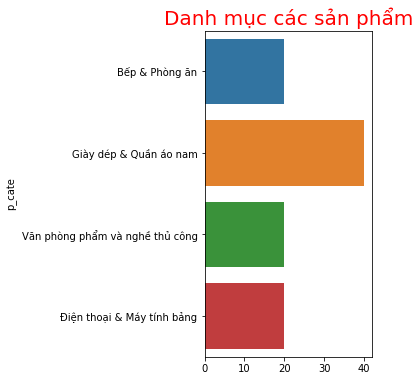

In [93]:
stat_table("p_cate", "Danh mục các sản phẩm")

**Thống kê giá sản phẩm**

lấy lại từ hàm stat_table nhưng tinh chỉnh lại

Phần trăm Sản phẩm có giá từ 0 - dưới 10k       20.0
Sản phẩm có giá từ 10k - dưới 100k    20.0
Sản phẩm có giá từ 100k - dưới 1tr    40.0
Sản phẩm có giá từ 1tr - 10tr         20.0
Sản phẩm có giá từ trên 10tr           0.0
dtype: float64


C:\Users\lybuu\AppData\Local\Programs\Python\Python38-32\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:title={'center':'Các khoảng giá tiền của các sản phẩm'}>

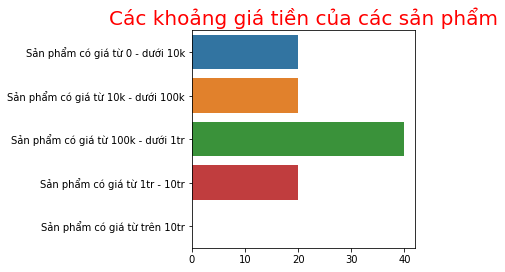

In [88]:
price_cate = data["p_price"]
# Phân loại và thống kê giá trị của các sản phẩm
list_cate = ["Sản phẩm có giá từ 0 - dưới 10k","Sản phẩm có giá từ 10k - dưới 100k","Sản phẩm có giá từ 100k - dưới 1tr","Sản phẩm có giá từ 1tr - 10tr","Sản phẩm có giá từ trên 10tr"]
count_list_cate = [0, 0, 0, 0, 0]
percent = []
for item in price_cate:
    if item<10000:
        count_list_cate[0] = count_list_cate[0] +1
    elif item<100000:
        count_list_cate[1] = count_list_cate[1] +1
    elif item<1000000:
        count_list_cate[2] = count_list_cate[2] +1
    elif item<10000000:
        count_list_cate[3] = count_list_cate[3] +1
    else:
        count_list_cate[4] = count_list_cate[4] +1
# Tính phần trăm
for item in count_list_cate:
    item = item/len(price_cate)*100
    percent.append(item)

# Vẽ barplot
price_df = pd.Series(percent, index=list_cate) # Tạo dataframe với 2 cột là tên danh mục và phần trăm các khoảng tiền
print("Phần trăm",price_df)
mylabels = price_df.index
fig = plt.figure(figsize = (4, 4))
plt.title('Các khoảng giá tiền của các sản phẩm', fontsize = 20, color = 'red')
sns.barplot(price_df, mylabels, orient = 'h')